In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.regressor import residuals_plot
from yellowbrick.model_selection import FeatureImportances

x_data = pd.read_csv("source.csv").drop(columns=[
    "sofifa_id",
    "GK",
    "value_eur",
    "international_reputation",
    "overall",
    "potential",
    "data_year",
    "wage_eur"
])
y_data = pd.read_csv("target_market_value.csv").to_numpy() /1000000

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [2]:

params = {'n_neighbors': [*range(1, 30, 2)], "metric": ["manhattan", "minkowski"]}

knn = KNeighborsRegressor()
model = GridSearchCV(knn, params,scoring="r2")
model.fit(x_train, y_train)
print(model.best_params_)

rmse_val = []  #to store rmse values for different k
for K in range(1, 30, 1):
    model = KNeighborsRegressor(n_neighbors=K, metric='manhattan')

    model.fit(x_train, y_train)  #fit the model
    predictions = model.predict(x_test)  #make prediction on test set
    error = mean_absolute_error(y_test, predictions)
    rmse_val.append(error)  #store rmse values

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)  #elbow curve

{'metric': 'manhattan', 'n_neighbors': 7}


<AxesSubplot:title={'center':'The error as the neighbours increase for the Market value'}, xlabel='Neighbours', ylabel='MAE'>

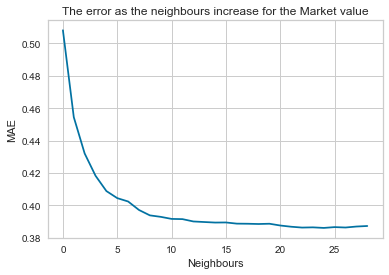

In [3]:
curve.plot(ylabel="MAE",legend=False, xlabel="Neighbours", title="The error as the neighbours increase for the Market value")



mse 0.978220213011549
mae 0.3887160212436622
RMSE 0.9890501569746345
MAPE 11560360938141.865
R2 0.31303722156682656


C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


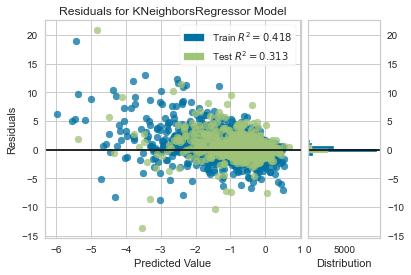

In [4]:
model = KNeighborsRegressor(n_neighbors=17, metric='manhattan')
model.fit(x_train, y_train)  #fit the model
predictions = model.predict(x_test)  #make prediction on test set
error = mean_squared_error(y_test, predictions)
print("mse", mean_squared_error(y_test, predictions))
print("mae", mean_absolute_error(y_test, predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

viz = residuals_plot(model, x_train, y_train, x_test, y_test)

In [5]:
params = {'max_depth': [*range(5, 10, 1)], "n_estimators": [5,10,15,20]}

forest = RandomForestRegressor()
model = GridSearchCV(forest, params,scoring="r2")
model.fit(x_train, y_train.ravel())
print(model.best_params_)

{'max_depth': 8, 'n_estimators': 20}


mse 0.5437125674172847
mae 0.33378063813739844
RMSE 0.7373686780826025
MAPE 10387939369757.244
R2 0.6181736065010115


C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


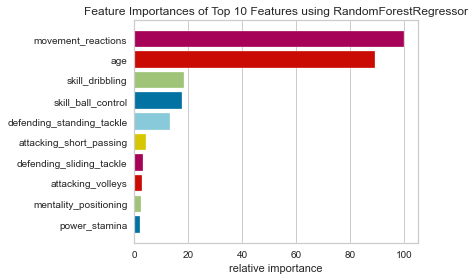

C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


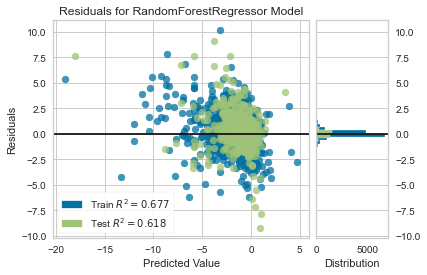

In [6]:
feature_names = x_data.columns.values
forest = RandomForestRegressor(max_depth=5, n_estimators=5)

forest.fit(x_train, y_train.ravel())
predictions = forest.predict(x_test)
print("mse", mean_squared_error(y_test, predictions))
print("mae", mean_absolute_error(y_test, predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

# # Get numerical feature importances
# importances = list(forest.feature_importances_)
# # List of tuples with variable and importance
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances)]
# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
# # Print out the feature and importances
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


visualizer = FeatureImportances(forest, topn=10)

visualizer.fit(x_data, y_data)
visualizer.show()

viz = residuals_plot(forest, x_train, y_train.ravel(), x_test, y_test.ravel())


mse 0.9803849900997049
mae 0.4979695461059897
RMSE 0.9901439239321246
MAPE 27560729703377.477
R2 0.31151698996315746


C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


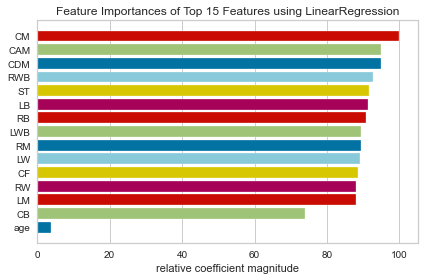

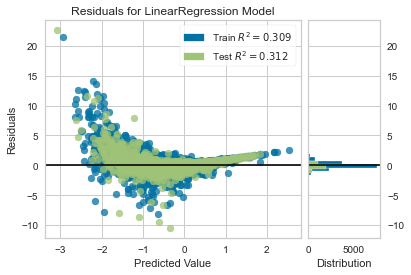

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train, y_train)
predictions = linreg.predict(x_test)
print("mse",mean_squared_error(y_test,predictions))
print("mae",mean_absolute_error(y_test,predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

visualizer = FeatureImportances(linreg, topn=15)

visualizer.fit(x_data, y_data)
visualizer.show();

viz = residuals_plot(LinearRegression(), x_train, y_train, x_test, y_test)




league_rank                  -0.161524
team_position                -0.106993
work_rate                    -0.106993
age                          -0.049501
CB                           -0.034270
LB                           -0.019956
nationality                  -0.018585
RB                           -0.016403
preferred_foot               -0.013681
height_cm                    -0.007419
LWB                          -0.006873
RWB                           0.000083
CM                            0.004225
CDM                           0.005276
RM                            0.007177
ST                            0.008088
weight_kg                     0.008840
club_name                     0.010449
LM                            0.014019
league_name                   0.040784
RW                            0.040822
CAM                           0.041966
LW                            0.053221
CF                            0.060078
power_strength                0.078850
defending_sliding_tackle 

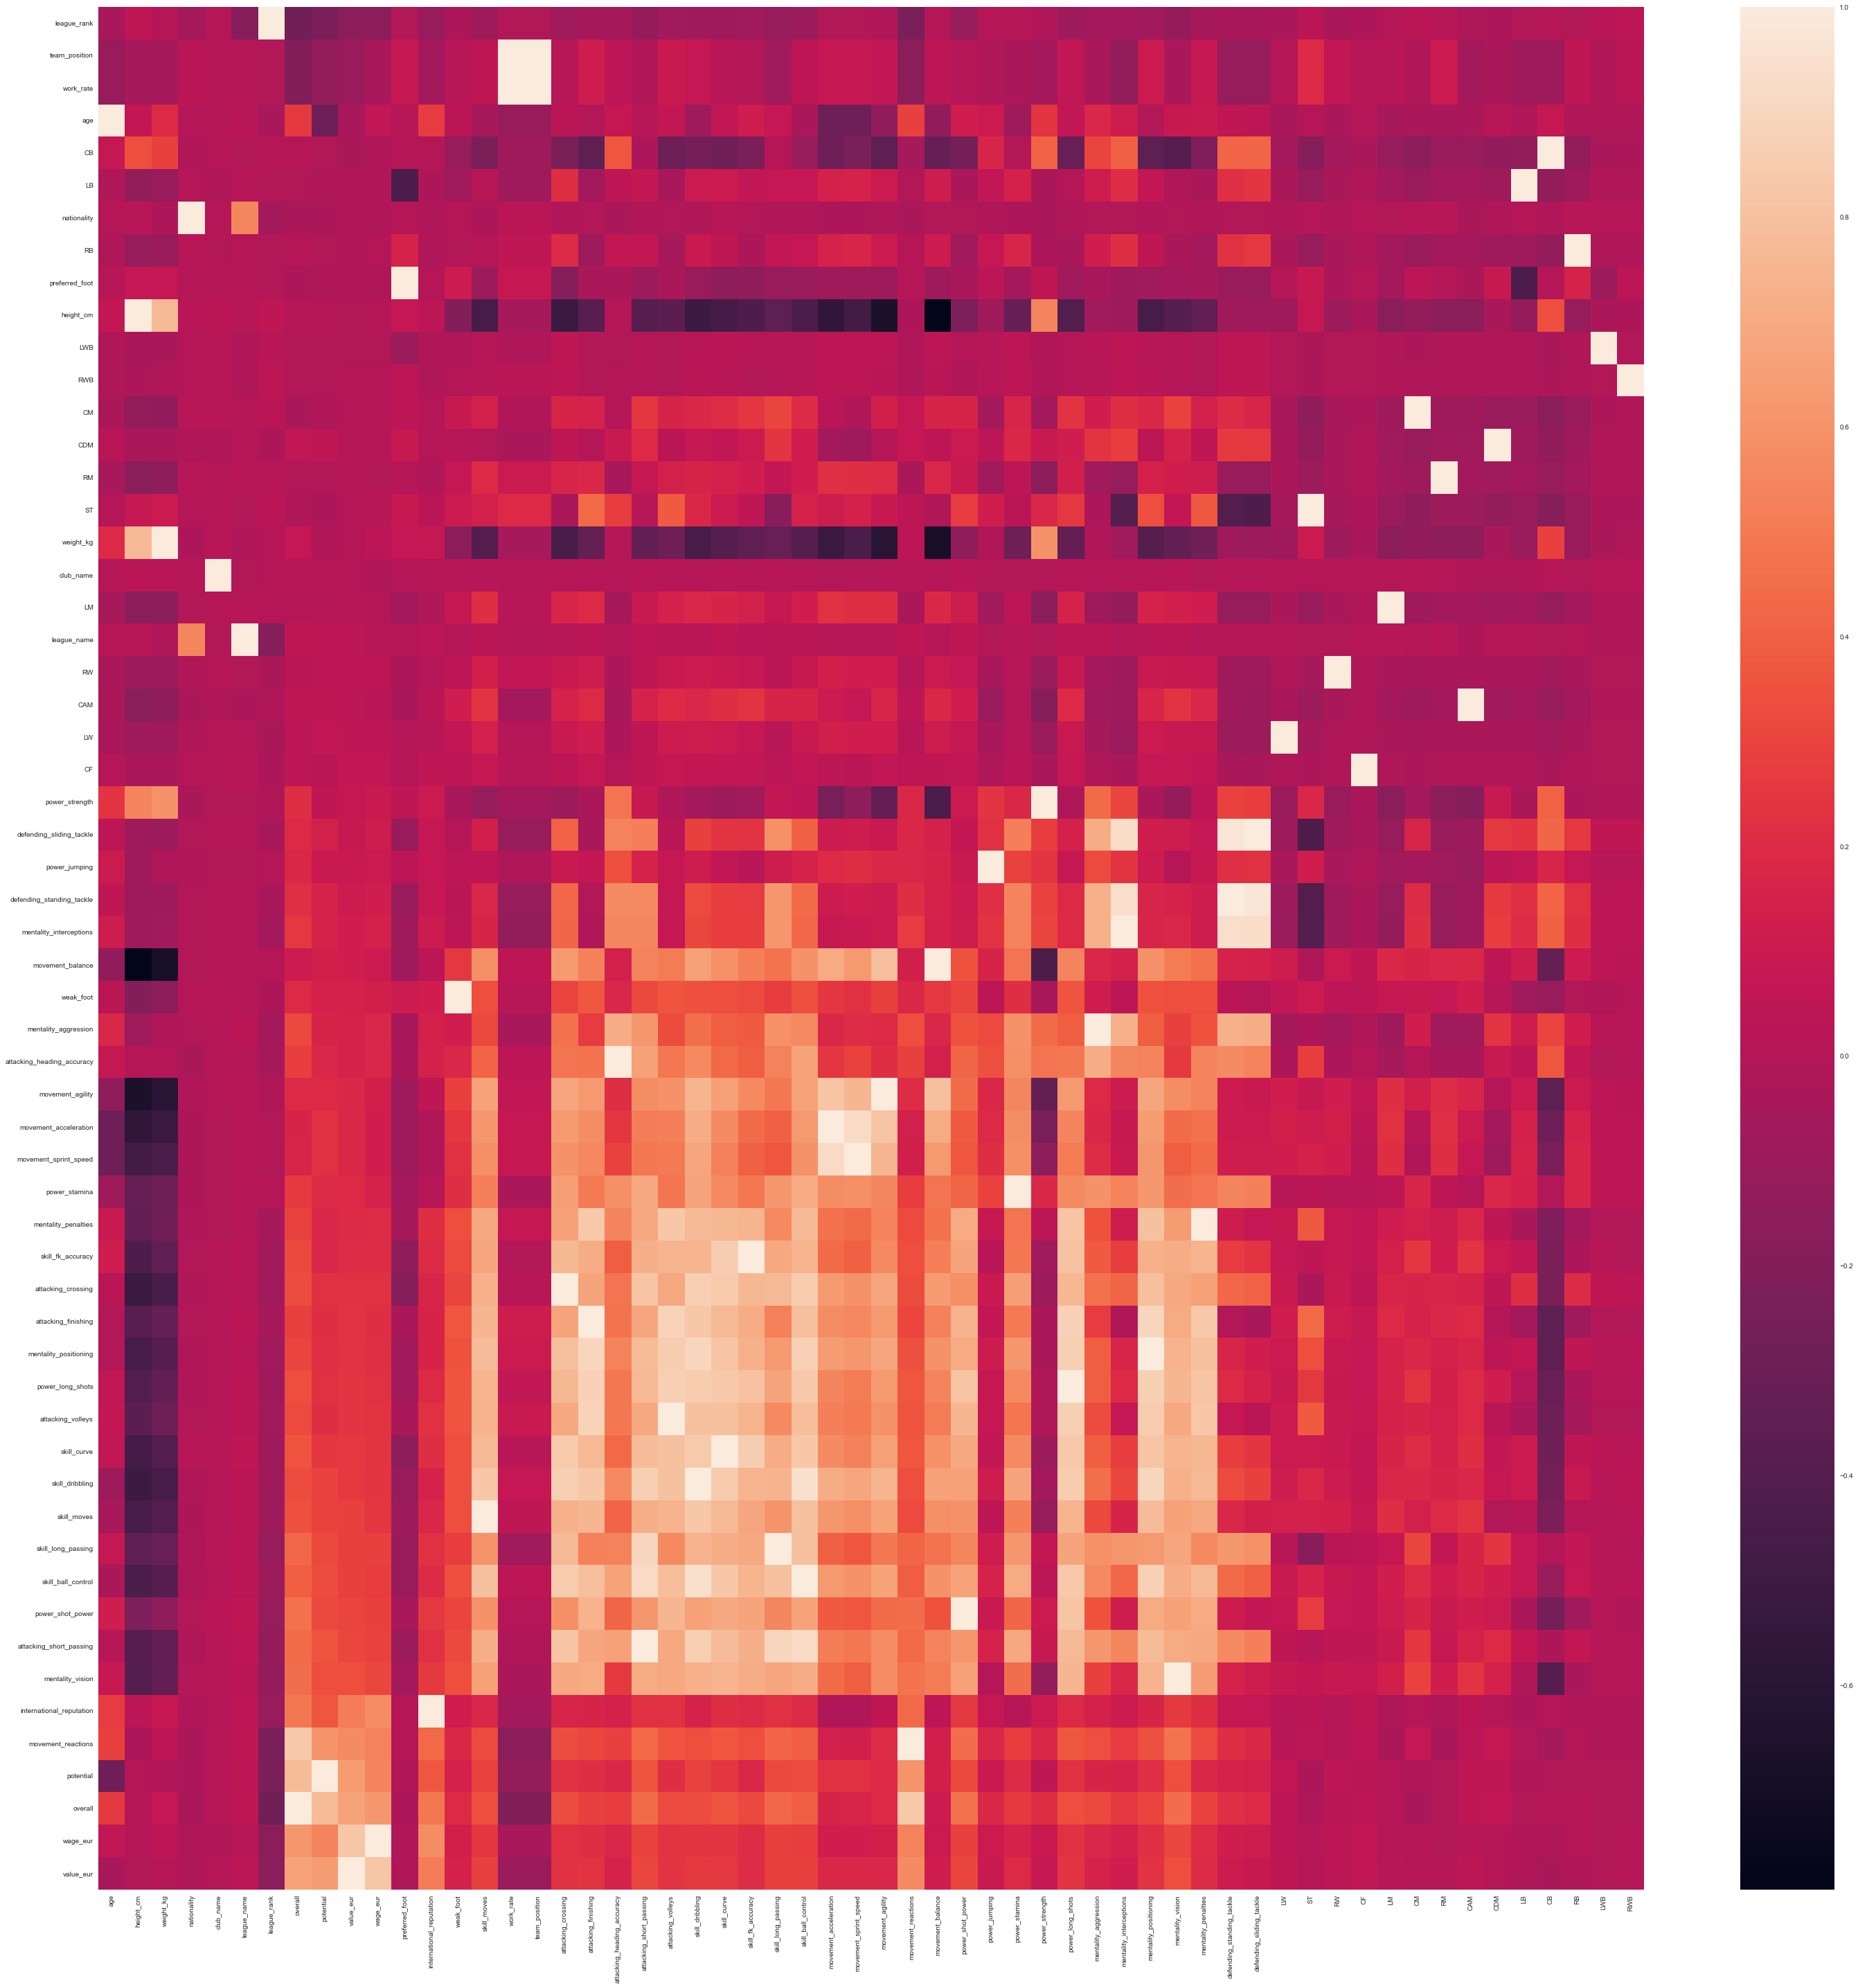

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
x_data = pd.read_csv("source.csv").drop(columns=[
    "sofifa_id",
    "GK",
    "data_year"
])
correlations = x_data.corr()["value_eur"]
print(correlations.sort_values())
correlations = x_data.corr()
plt.figure(figsize = (50,50))
sns.heatmap(correlations.sort_values(by="value_eur"))
plt.savefig("heatmap_marketvalue.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'International reputation vs overall rating'}, xlabel='international_reputation', ylabel='value_eur'>

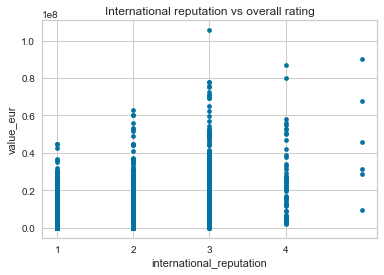

In [9]:
x_data.plot(
    x="international_reputation",
    y="value_eur",
    title="International reputation vs overall rating",
    kind="scatter",
    xticks= [1,2,3,4]
)


In [2]:

scaler = MinMaxScaler()

x_data = scaler.fit_transform(pd.read_csv("source.csv").drop(columns=[
    "sofifa_id",
    "GK",
    "value_eur",
    "international_reputation",
    "overall",
    "potential",
    "data_year",
    "wage_eur"
]))
y_data = pd.read_csv("target_market_value.csv").to_numpy() /1000000

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

regr = MLPRegressor(random_state=1, max_iter=500, early_stopping=True).fit(x_train, y_train.ravel())

predictions = regr.predict(x_test)
print("mse",mean_squared_error(y_test.ravel(),predictions))
print("mae",mean_absolute_error(y_test.ravel(),predictions))
print("RMSE", mean_squared_error(y_test.ravel(), predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test.ravel(), predictions))
print("R2", r2_score(y_test.ravel(), predictions))

mse 0.49067133624480974
mae 0.33318401658982905
RMSE 0.700479361755084
MAPE 12003686932138.11
R2 0.6554222250156337


In [7]:
print(x_train.shape, y_train.ravel(), x_test.shape, y_test.shape)

(15285, 53) [-0.26517857 -3.48785714  0.0975     ...  0.16785714  0.1275
 -0.2475    ] (3822, 53) (3822, 1)


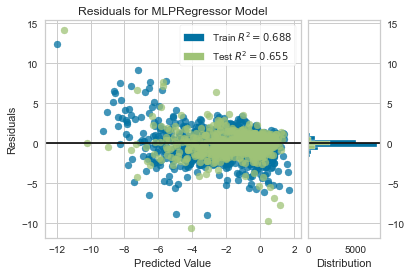

In [8]:
viz = residuals_plot(MLPRegressor(random_state=1, max_iter=500, early_stopping=True), x_train, y_train.ravel(), x_test, y_test.ravel())